In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [16]:
df = pd.read_csv("train.csv")

In [17]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [19]:
# Descriptive statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [20]:
missing = df.isnull().sum()
missing[missing > 0].sort_values(ascending=False)
# Count missing values

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [21]:
drop_cols = [col for col in df.columns if df[col].isnull().sum() > len(df) * 0.4]
df.drop(columns=drop_cols, inplace=True)

In [22]:
print(drop_cols)

['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [23]:
num_cols = df.select_dtypes(include='number').columns
cat_cols = df.select_dtypes(include='object').columns

In [24]:
# For numeric columns
for col in num_cols:
    df[col] = df[col].fillna(df[col].median())

In [25]:
# For categorical columns
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [27]:
# Create new feature
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']

In [28]:
# Encode categorical columns
df = pd.get_dummies(df, drop_first=True)

In [29]:
from sklearn.model_selection import train_test_split

X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error: {rmse:.2f}")


Root Mean Squared Error: 29990.09


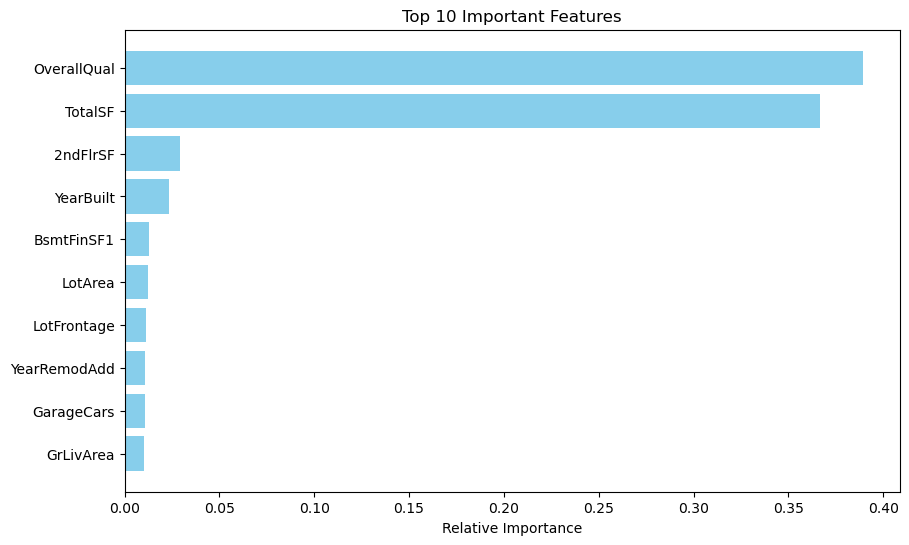

In [31]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10

plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features")
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()


In [32]:
import pandas as pd

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


In [33]:
train['source'] = 'train'
test['source'] = 'test'
test['SalePrice'] = 0  # temporary placeholder

data = pd.concat([train, test], ignore_index=True)

In [34]:
# Drop high-missing columns
drop_cols = [col for col in data.columns if data[col].isnull().sum() > 0.4 * len(data)]
data.drop(columns=drop_cols, inplace=True)

In [35]:
# Separate columns
num_cols = data.select_dtypes(include='number').columns
cat_cols = data.select_dtypes(include='object').columns

In [36]:
# Fill missing
for col in num_cols:
    data[col] = data[col].fillna(data[col].median())
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])

In [37]:
# Add new features
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

# Encode categoricals
data = pd.get_dummies(data, drop_first=True)


In [38]:
train['source'] = 'train'
test['source'] = 'test'
test['SalePrice'] = 0  # Placeholder for consistency

# Combine
data = pd.concat([train, test], ignore_index=True)


In [39]:
train_data = data[data['source'] == 'train'].drop(['source'], axis=1)
test_data = data[data['source'] == 'test'].drop(['source', 'SalePrice'], axis=1)

In [40]:
X_train = train_data.drop("SalePrice", axis=1)
y_train = train_data["SalePrice"]

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
# Identify categorical columns
cat_cols = data.select_dtypes(include='object').columns

In [45]:
# Fill missing values for categorical columns (if any)
for col in cat_cols:
    data[col] = data[col].fillna(data[col].mode()[0])


In [46]:
# One-hot encode all categorical features
data = pd.get_dummies(data, drop_first=True)

In [47]:
# Split again after encoding
train_data = data[data['source_train'] == 1].drop(['source_train'], axis=1)
X_train = train_data.drop('SalePrice', axis=1)
y_train = train_data['SalePrice']

test_data = data[data['source_train'] == 0].drop(['SalePrice', 'source_train'], axis=1)


In [48]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train) 


RandomForestRegressor(random_state=42)

In [49]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
# Predict on training data
train_preds = model.predict(X_train)

# RMSE on training data
rmse = np.sqrt(mean_squared_error(y_train, train_preds))
print(f"Training RMSE: {rmse:.2f}")

# Cross-validation RMSE
cv_rmse = np.sqrt(-cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5))
print(f"Cross-Validation RMSE: {cv_rmse.mean():.2f}")


Training RMSE: 11248.02
Cross-Validation RMSE: 30149.88


In [51]:
test_preds = model.predict(test_data)

In [52]:
submission = pd.DataFrame({
    "Id": test["Id"],
    "SalePrice": test_preds
})

submission.to_csv("house_price_submission.csv", index=False)
print("Submission file saved as house_price_submission.csv")


Submission file saved as house_price_submission.csv


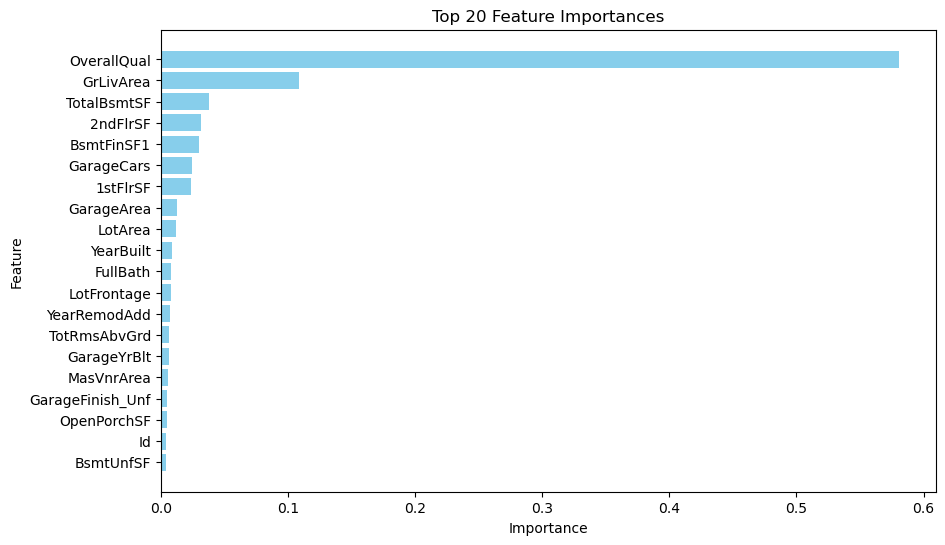

In [53]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)[-20:]  # Top 20 features

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], color='skyblue')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()